# 객체지향언어와 실습 프로젝트  
### data creater
2017112160 조민식  
2017112203 윤기복  
2017112207 이건우

라이브러리를 임포트하고 cv2의 버전을 확인합니다.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
print(cv2.__version__)

4.4.0


폰트 리스트를 확인합니다.

In [2]:
path='C:\\Users\\YKB\\Desktop\\project\\font'
font_array=os.listdir(path)
print(font_array)

['0_arial.png', '0_arialnarrow.png', '0_bahnschrift.png', '0_bookantique.png', '0_calibri.png', '0_cambria.png', '0_garamond.png', '0_georgia.png', '0_sylfaen.png', '0_timesnewroman.png', '0_trebuchetms.png', '0_verdana.png', '1_arial.png', '1_arialnarrow.png', '1_bahnschrift.png', '1_bookantique.png', '1_calibri.png', '1_cambria.png', '1_garamond.png', '1_microsoftyahei.png', '1_mingliu-extb.png', '1_sylfaen.png', '1_timesnewroman.png', '1_trebuchetms.png', '1_verdana.png', '2_arialnarrow.png', '2_bookantique.png', '2_calibri.png', '2_cambria.png', '2_garamond.png', '2_georgia.png', '2_trebuchetms.png', '2_verdana.png', '3_arial.png', '3_arialnarrow.png', '3_bahnschrift.png', '3_bookantique.png', '3_calibri.png', '3_cambria.png', '3_garamond.png', '3_microsoftyahei.png', '3_sylfaen.png', '3_timesnewroman.png', '3_trebuchetms.png', '3_verdana.png']


데이터를 만들 폰트를 고릅니다.

In [5]:
index=31
font_array[index]

'2_trebuchetms.png'

폰트를 이미지로 불러와 확인합니다.

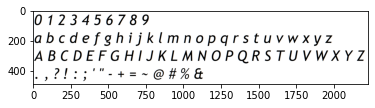

In [6]:
img= cv2.imread("font\\"+font_array[index])

if(img is not None):
    plt.imshow(img)  
    plt.show()
else:# 불러오지 못하면 오류 메세지 출력
    print('Image is not loaded')

폰트 이미지에서 줄을 추출합니다. 트랙바 이미지가 실행됩니다.

rects: [(0, 24, 770, 71), (0, 142, 1990, 91), (0, 262, 2227, 87), (0, 381, 356, 86), (503, 381, 627, 76), (401, 382, 70, 18)]
num of rects: 6


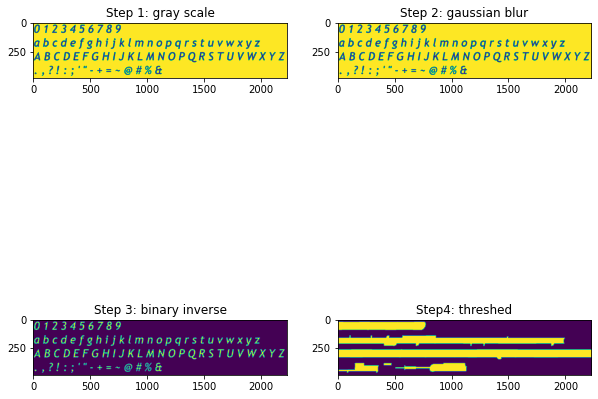

In [7]:
fig, ax=plt.subplots(2,2,figsize=(10,10))# 그림을 여러개 그리기 위한 fig 생성

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# 이미지 전 처리 1. RGB to Gray
ax[0,0].imshow(img_gray)
ax[0,0].set_title('Step 1: gray scale')

img_blur = cv2.GaussianBlur(img_gray, (1, 1), 0)# 이미지 전 처리 2. 가우시안 블러
ax[0,1].imshow(img_blur)
ax[0,1].set_title('Step 2: gaussian blur')

ret, img_th = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)# 이미지 전 처리 3. 127보다 크면 0 작으면 255 : 이진화 + 반전
ax[1,0].imshow(img_th)
ax[1,0].set_title('Step 3: binary inverse')

def nothing(x):# 트랙바를 사용하기 위한 아무 기능이 없는 함수
    pass

cv2.namedWindow('kernel')# 윈도우 창 생성
cv2.createTrackbar('row','kernel',1,100,nothing)# 트랙바로 0부터 100까지 조절 가능
cv2.createTrackbar('column','kernel',1,100,nothing)
cv2.setTrackbarPos('row','kenel',1)# 트랙바 초기값은 1
cv2.setTrackbarPos('column','kenel',1)

while cv2.waitKey(1)!=ord('q'):# 키보드 q가 눌릴 때 까지 반복: q 누르면 종료
    row=cv2.getTrackbarPos('row','kernel')# 트랙바 값을 받아와서
    column=cv2.getTrackbarPos('column','kernel')
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))# 모폴로지 연산 항상 양수여야 하므로 +1
    img_threshed = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, rect_kernel)
    cv2.imshow('kernel',img_threshed)# 실시간으로 보여주기
cv2.destroyAllWindows()# 트랙바 이벤트가 끝나면 윈도우 창 제거

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))# 트랙바 조절 값으로 실제 모폴로지 연산
img_threshed = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, rect_kernel)
ax[1,1].imshow(img_threshed)
ax[1,1].set_title('Step4: threshed')

contours, hierachy= cv2.findContours(img_threshed.copy(), # 복사한 이미지를 이용해 윤곽선 따기
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 외부 윤곽선만, 최소한의 점으로

rects = [cv2.boundingRect(each) for each in contours]
rects.sort(key=lambda x : (x[1],x[0]))# 줄을 추출했으므로  y좌표로 정렬 후, x좌표로 정렬
print('rects:',rects) # x y w h
print('num of rects:',len(rects))

추출한 줄을 둘러싸는 사각형대로 슬라이싱하고 생성된 줄 이미지를 저장합니다.

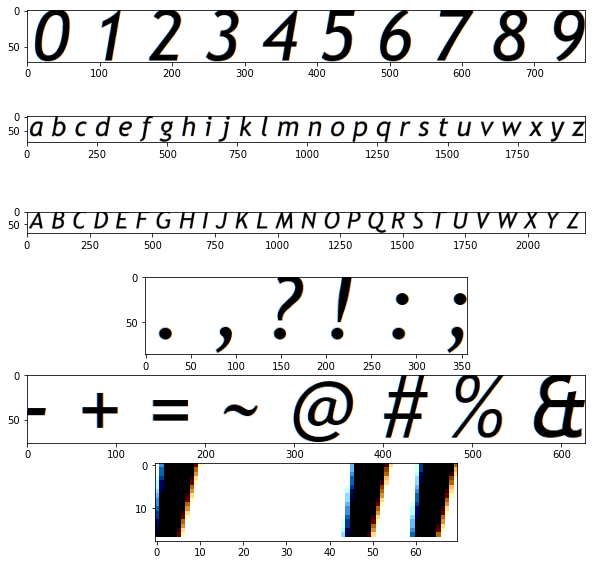

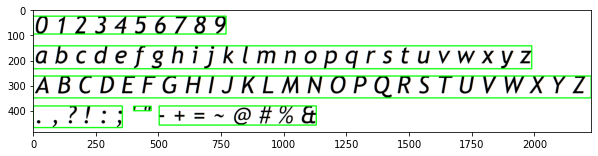

In [8]:
path='C:\\Users\\YKB\\Desktop\\project\\'

if len(rects)>1:# 줄이 여러개면 그림 여러개 그려야한다
    fig, ax=plt.subplots(len(rects),1,figsize=(10,10))

i=0
result_img=img.copy()# 이미지를 복사하고

for rect in rects:# 줄마다 실행
    cropped_img = img[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]# 이미지 슬라이싱 y:y+h,x:x+w
    if len(rects)>1:# 줄이 여러개면 순차적으로 보여준다
        ax[i].imshow(cropped_img)
    else:
        plt.imshow(cropped_img)
    cv2.imwrite(os.path.join(path+'font_line', 'line_'+str(i).zfill(2)+'.png'),cropped_img)# 해당 경로에 line_00.png로 저장
    i=i+1

for rect in rects:#원본 이미지에 사각혈 그려서 보여주기
    cv2.rectangle(result_img, (rect[0], rect[1]), # 시작점(x,y)
                 (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)# 끝점(x+w,y+h), 녹색(0, 255, 0), 두께 3 
    
plt.figure(figsize=(10,10))
plt.imshow(result_img);

같은 작업을 반복하여 줄에서 문자를 추출합니다.

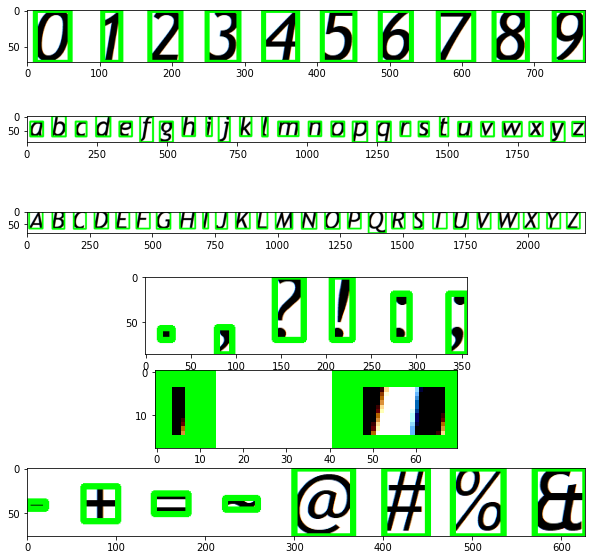

In [11]:
#예시 이미지 처리
row=1
column=1
example=cv2.imread("font_line\\line_03.png")# 예시 이미지
example_gray = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
example_blur = cv2.GaussianBlur(example_gray, (1, 1), 0)
ret, example_th = cv2.threshold(example_blur, 127, 255, cv2.THRESH_BINARY_INV)

def nothing(x):
    pass

cv2.namedWindow('kernel')
cv2.createTrackbar('row','kernel',1,100,nothing)
cv2.createTrackbar('column','kernel',1,100,nothing)
cv2.setTrackbarPos('row','kenel',1)
cv2.setTrackbarPos('column','kenel',1)

while cv2.waitKey(1)!=ord('q'):
    row=cv2.getTrackbarPos('row','kernel')
    column=cv2.getTrackbarPos('column','kernel')
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))
    img_threshed = cv2.morphologyEx(example_th, cv2.MORPH_CLOSE, rect_kernel)
    cv2.imshow('kernel',img_threshed)
cv2.destroyAllWindows()

# 줄에서 문자 추출
path='C:\\Users\\YKB\\Desktop\\project\\'
num=0 # 줄을 세는 변수
i=0 #문자를 세는 변수
if len(os.listdir(path+"line"))>1:
    fig,ax=plt.subplots(len(os.listdir(path+"font_line")),1,figsize=(10,10))

for line in os.listdir(path+"font_line"):
    
    img= cv2.imread("font_line\\line_"+str(num).zfill(2)+".png")

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    ret, img_th = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (row+1, column+1))
    img_threshed = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, rect_kernel)
    
    contours, hierachy= cv2.findContours(img_threshed.copy(), 
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    rects = [cv2.boundingRect(each) for each in contours]
    rects.sort(key=lambda x : (x[0]))# 줄 속 문자는 x좌표로 정렬

    result_img=img.copy()

    for rect in rects:
        cropped_img = img_th[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
        cv2.imwrite(os.path.join(path+'font_letter', 'letter_'+str(i).zfill(2)+'.png'),cropped_img)
        
        cv2.rectangle(result_img, (rect[0], rect[1]), 
                     (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 
        i=i+1
        
    if len(os.listdir(path+"font_line")) > 1:
        ax[num].imshow(result_img)
    else:
        plt.imshow(result_img)
            
    num=num+1

패딩하고 사이즈를 28*28로 통일합니다

In [12]:
j=0
path='C:\\Users\\YKB\\Desktop\\project\\'
os.mkdir(path+"data\\"+font_array[index])
for letter in os.listdir(path+"font_letter"):
    
    image=cv2.imread("font_letter\\"+letter)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    width=image.shape[1]#너비는 이미지의 열 개수
    height=image.shape[0]# 높이는 이미지의 행 개수
    half_width=round(width/2)
    half_height=round(height/2)
    q1_height=round(height/4)
    q1_width=round(width/4)
    q3_height=round(height*3/4)
    q3_width=round(width*3/4)
    
    if(height>width):# 세로로 더 긴 이미지        
        image=np.pad(image, ((q1_height,q1_height),(q3_height-half_width,q3_height-half_width)),'constant')
    elif(width>=height):# 가로로 더 긴 이미지
        image=np.pad(image, ((q3_width-half_height,q3_width-half_height),(q1_width,q1_width)),'constant')
        
    image=cv2.resize(image,(28,28))# 사이즈 통일
    cv2.imwrite(os.path.join(path+'data\\'+font_array[index],str(j).zfill(2)+"_"+font_array[index]+".png"),image)# 같은 경로에 저장
    j=j+1

트랙바 조절을 적절하게 하지 못했거나 한 폰트의 데이터 생성을 완료했으면 아래의 코드를 이용해 추출한 줄과 문자를 제거하고 다음 폰트로 넘어갑니다.

In [77]:
#delect line
path='C:\\Users\\YKB\\Desktop\\project\\'
j=0
for line in os.listdir("C:\\Users\\YKB\\Desktop\\project\\font_line"):
    os.remove(path+"font_line\\line_"+str(j).zfill(2)+".png")
    j=j+1

In [10]:
# delect letter
path='C:\\Users\\YKB\\Desktop\\project\\'
j=0
for dir in os.listdir("C:\\Users\\YKB\\Desktop\\project\\font_letter"):
    os.remove(path+"font_letter\\letter_"+str(j).zfill(2)+".png")
    j=j+1